#### Naive Bayes

In [4]:
%reload_ext autoreload
%autoreload 2

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from src.paths import TRANSFORMED_DATA_DIR
from src.split_and_tfidf import split_and_vect 

In [2]:
df = pd.read_parquet(TRANSFORMED_DATA_DIR / 'cleaned_sentiments.parquet')
df.head()

,recommended,cleaned
0,1,Very good flight following an equally good fli...
1,1,An hours delay due to late arrival of the inco...
2,0,I booked through BA because Loganair dont have...
3,0,British airways lost bags in LHR then found th...
4,0,The check in process and reward loyalty progra...


In [3]:
df_copy = df.copy()

In [5]:
# split the data and make a tfidf vectorizer
X_train_vec, X_test_vec, y_train, y_test, tfidf_vec = split_and_vect(df_copy, 'cleaned', 'recommended')

In [6]:
# naive bayes
from sklearn.naive_bayes import MultinomialNB

# instantiate model
nb = MultinomialNB()

# fit the model
nb.fit(X_train_vec, y_train)

# make predictions
y_pred = nb.predict(X_test_vec)

In [9]:
# metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       503
           1       0.98      0.16      0.27       276

    accuracy                           0.70       779
   macro avg       0.83      0.58      0.54       779
weighted avg       0.79      0.70      0.62       779



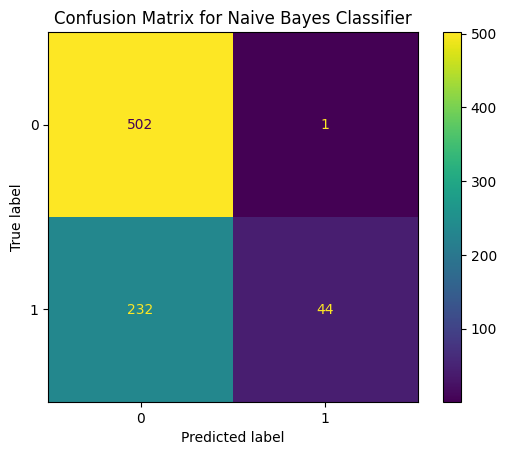

In [11]:
# confusion matrix
ConfusionMatrixDisplay.from_estimator(nb, X_test_vec, y_test)
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

In [12]:
from src.stemming_and_lemming import stem_reviews

In [13]:
# stem the data
df_stem = df.copy()

In [15]:
df_stem['stemmed'] = stem_reviews(df_stem['cleaned'])
df_stem.head()

,recommended,cleaned,stemmed
0,1,Very good flight following an equally good fli...,veri good flight follow an equal good flight t...
1,1,An hours delay due to late arrival of the inco...,an hour delay due to late arriv of the incom a...
2,0,I booked through BA because Loganair dont have...,i book through ba becaus loganair dont have re...
3,0,British airways lost bags in LHR then found th...,british airway lost bag in lhr then found them...
4,0,The check in process and reward loyalty progra...,the check in process and reward loyalti progra...


In [16]:
# split and vectorize
X_train_stem, X_test_stem, y_train, y_test, tfidf_stem_vec = split_and_vect(df_stem, 'stemmed', 'recommended')

In [17]:
# fit stemmed to naive bayes
# instantiate
nb_stem = MultinomialNB()

# fit to the data
nb_stem.fit(X_train_stem, y_train)

# make predictions
y_pred_stem = nb_stem.predict(X_test_stem)


In [18]:
# classification report
print(classification_report(y_test, y_pred_stem))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       503
           1       0.97      0.13      0.24       276

    accuracy                           0.69       779
   macro avg       0.83      0.57      0.52       779
weighted avg       0.78      0.69      0.60       779



Text(0.5, 1.0, 'Confusion Matrix for Stemmed Naive Bayes')

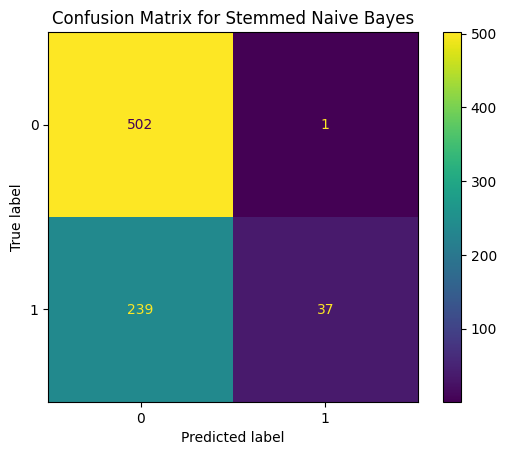

In [20]:
# confusion display
ConfusionMatrixDisplay.from_estimator(nb_stem, X_test_stem, y_test)
plt.title('Confusion Matrix for Stemmed Naive Bayes')

#### Lemmatized

In [21]:
# make a copy of the data
df_lemm = df.copy()

# lemmatize
from src.stemming_and_lemming import get_wordnet_pos, lemmatize_reviews

df_lemm['lemmatized'] = lemmatize_reviews(df['cleaned'])
df_lemm.head()

,recommended,cleaned,lemmatized
0,1,Very good flight following an equally good fli...,Very good flight follow an equally good flight...
1,1,An hours delay due to late arrival of the inco...,An hour delay due to late arrival of the incom...
2,0,I booked through BA because Loganair dont have...,I book through BA because Loganair dont have r...
3,0,British airways lost bags in LHR then found th...,British airway lose bag in LHR then find them ...
4,0,The check in process and reward loyalty progra...,The check in process and reward loyalty progra...


In [23]:
# split lemmatized data
X_train_lem, X_test_lem, y_train, y_test, tfidf_lem = split_and_vect(df_lemm, 'lemmatized', 'recommended')

In [24]:
# naive bayes of lemmatized
nb_lemm = MultinomialNB()

In [25]:
# fit and predict
nb_lemm.fit(X_train_lem, y_train)

# predict
y_pred_lem = nb_lemm.predict(X_test_lem)

# classification report
print(classification_report(y_test, y_pred_lem))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       503
           1       0.87      0.07      0.13       276

    accuracy                           0.67       779
   macro avg       0.77      0.53      0.46       779
weighted avg       0.74      0.67      0.56       779



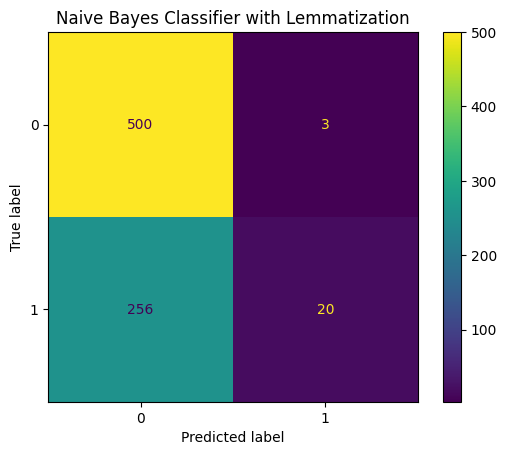

In [27]:
# confusion matrix
ConfusionMatrixDisplay.from_estimator(nb_lemm, X_test_lem, y_test)
plt.title('Naive Bayes Classifier with Lemmatization')
plt.show()